# Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.



https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
train.shape

(5961, 7)

In [7]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [9]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [10]:
test.shape

(1987, 6)

In [11]:
DoctorDF=train.append(test)

In [12]:
DoctorDF.shape

(7948, 7)

In [13]:
DoctorDF.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [14]:
DoctorDF['Rating'].fillna('0%', inplace=True)

DoctorDF['Place'].fillna('Unknown,Unknown', inplace=True)

DoctorDF['Miscellaneous_Info'].fillna('Unknown', inplace=True)

DoctorDF['Fees'].fillna('0', inplace=True)


In [15]:
DoctorDF.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [16]:
DoctorDF["Experience"] =DoctorDF["Experience"].str.split()
DoctorDF["Experience"] = DoctorDF["Experience"].str[0].astype("int")

In [17]:
DoctorDF.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0%,"Mathikere - BEL, Bangalore",ENT Specialist,Unknown,300
3,"BSc - Zoology, BAMS",12,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [18]:
#DoctorDF["Place"].fillna("Unknown,Unknown",inplace=True)
DoctorDF["Place"] = DoctorDF["Place"].str.split(",")
DoctorDF["City"] = DoctorDF["Place"].str[-1]
DoctorDF["Place"] = DoctorDF["Place"].str[0]

In [19]:
DoctorDF.head(25)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0%,Mathikere - BEL,ENT Specialist,Unknown,300,Bangalore
3,"BSc - Zoology, BAMS",12,0%,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
5,BAMS,8,0%,Porur,Ayurveda,Unknown,100,Chennai
6,BHMS,42,0%,Karol Bagh,Homeopath,Unknown,200,Delhi
7,BDS,10,99%,Arekere,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Bangalore
8,"MBBS, MD - General Medicine",14,0%,Old City,General Medicine,Unknown,100,Hyderabad
9,"BSc, BDS",23,0%,Athani,Dentist,Unknown,100,Ernakulam


In [20]:
DoctorDF["Rating"] = DoctorDF["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
DoctorDF["Rating"] = pd.cut(DoctorDF["Rating"],bins=bins,labels=labels,include_lowest=True)

In [21]:
DoctorDF.head(25)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,Mathikere - BEL,ENT Specialist,Unknown,300,Bangalore
3,"BSc - Zoology, BAMS",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
5,BAMS,8,0,Porur,Ayurveda,Unknown,100,Chennai
6,BHMS,42,0,Karol Bagh,Homeopath,Unknown,200,Delhi
7,BDS,10,10,Arekere,Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,Bangalore
8,"MBBS, MD - General Medicine",14,0,Old City,General Medicine,Unknown,100,Hyderabad
9,"BSc, BDS",23,0,Athani,Dentist,Unknown,100,Ernakulam


In [22]:
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

DoctorDF['Qualification'] = DoctorDF['Qualification'].apply(clean_text)
DoctorDF['Miscellaneous_Info'] = DoctorDF['Miscellaneous_Info'].apply(clean_text)

In [23]:
DoctorDF['Qualification'].value_counts()

bds                                                                                                           632
bhms                                                                                                          627
bams                                                                                                          624
mbbs                                                                                                          441
mbbs ms ent                                                                                                   280
                                                                                                             ... 
bds mds mds conservative dentistry endodontics                                                                  1
bhms post graduate diploma in emergency services pgdems pg certificate course in diabetes education pgdce       1
diploma in otorhinolaryngology dlo ms ent mbbs                                          

In [24]:
DoctorDF['Miscellaneous_Info'].value_counts()

unknown                                                               3454
acrylic partial denture crowns and bridges fixing artificial teeth      50
 feedback dwarka delhi                                                  38
 feedback hsr layout bangalore                                          35
 feedback whitefield bangalore                                          26
                                                                      ... 
artificial teeth scaling polishing teeth whitening                       1
chickenpox treatment hair treatment neck pain treatment                  1
fever treatment health checkup general electrocardiography ecg           1
ceramic veneers crowns tooth extraction rct single sitting               1
allergy treatment arthritis management bronchial asthma treatment        1
Name: Miscellaneous_Info, Length: 2435, dtype: int64

In [25]:
DoctorDF['Place'].value_counts()

Andheri West          97
HSR Layout            97
Dwarka                94
Banjara Hills         85
Mulund West           81
                      ..
Neyyattinkara Town     1
JP Nagar 9 Phase       1
Bhogal                 1
Durga Puri             1
Dwarka Sector 4        1
Name: Place, Length: 938, dtype: int64

In [26]:
DoctorDF['City'].value_counts()

 Bangalore             1678
 Mumbai                1608
 Delhi                 1602
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
Unknown                  31
e                         1
Name: City, dtype: int64

In [27]:
DoctorDF.drop(["Qualification",'Miscellaneous_Info'],axis=1,inplace=True)

In [28]:
DoctorDF["Fees"] = DoctorDF["Fees"].astype("int")

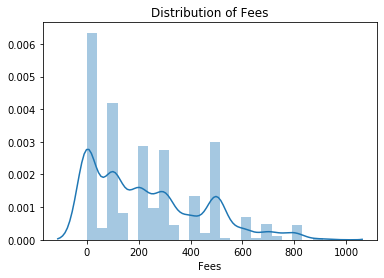

In [29]:
sns.distplot(DoctorDF["Fees"])
plt.xlabel("Fees")
plt.title("Distribution of Fees")
plt.show()

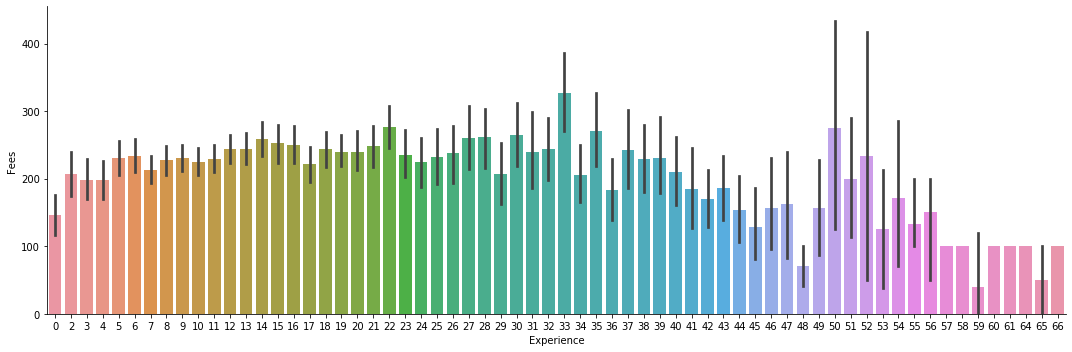

In [30]:
sns.factorplot(x = 'Experience', y='Fees', kind = 'bar', data=DoctorDF,aspect = 3)

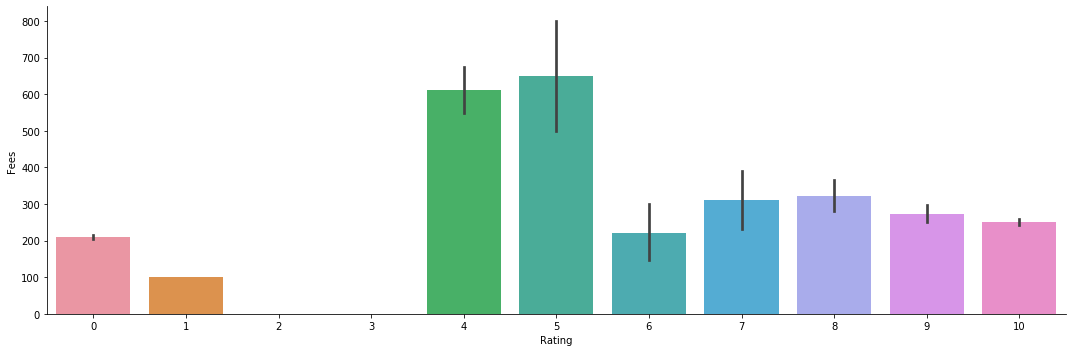

In [31]:
sns.factorplot(x = 'Rating', y='Fees', kind = 'bar', data=DoctorDF,aspect = 3)

In [32]:
DoctorDF.head()

,Experience,Rating,Place,Profile,Fees,City
0,24,10,Kakkanad,Homeopath,100,Ernakulam
1,12,10,Whitefield,Ayurveda,350,Bangalore
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore
4,20,10,Keelkattalai,Ayurveda,250,Chennai


In [33]:
from sklearn.preprocessing import LabelEncoder
Lb=LabelEncoder()
DoctorDF['Place']=Lb.fit_transform(DoctorDF['Place'])
DoctorDF['City']=Lb.fit_transform(DoctorDF['City'])
DoctorDF['Profile']=Lb.fit_transform(DoctorDF['Profile'])

In [34]:
train_set=DoctorDF[0:5961]
test_set=DoctorDF[5961:]
test_set=test_set.drop(['Fees'],axis=1)

In [35]:
train_set.shape,test_set.shape

((5961, 6), (1987, 5))

In [36]:
train_set.head()

,Experience,Rating,Place,Profile,Fees,City
0,24,10,324,5,100,4
1,12,10,926,0,350,0
2,9,0,494,3,300,0
3,12,0,74,0,250,0
4,20,10,367,0,250,1


In [37]:
#separating input and output variable
df_x=train_set.drop(['Fees'],axis=1)
y=train_set.Fees
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
#x.head()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_val)
        r2_scr=r2_score(y_val,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [39]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 68 is 0.07717769501687832


In [40]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 26}

In [41]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=26)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 63 is 0.1845142900404012


In [42]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.05301979766729801
Standard deviation in r2 score for Linear Regression :  0.010270386042940149


 Mean r2 score for KNN Regression :  0.14385167576863966
Standard deviation in r2 score for KNN Regression :  0.011410829189772771


In [43]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [44]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 68 is 0.07717642001358604


In [45]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.05301982386972377
standard deviation for lasso ragression :  0.010269636605196837


In [46]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [47]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regrssion :  0.23906544927031917
Standard Deviation r2 score for gradient boosting Regrssion :  0.026178723527860544


In [48]:
#Now Lets use ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [49]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=500)
print('Mean r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for ada boosting regression : 0.09769021686576558
Standard Deviation r2 score for ada boosting regression : 0.040611235021238444


In [50]:
#lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,x,y)



max r2 score corresponding to random state: 99 is 0.17223824799826049


In [51]:
# we tried all the model and till now linear regression is the best
#random state corresponding to highest r2_score is 68
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,test_size=0.20)
lreg=LinearRegression()        
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [52]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  184.9538837251381
r2_score is :  0.07717769501687832


In [53]:
from sklearn.externals import joblib
joblib.dump(lreg,'fees_model.pkl')

['fees_model.pkl']

In [54]:
model=joblib.load('fees_model.pkl')

In [56]:
result=pd.DataFrame(model.predict(test_set))

In [57]:
result.to_csv('DoctorFeesprdictresults.csv')